In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/CSCI_5541_project/comare_best_vs_pretrained')

Mounted at /content/drive


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.4 MB/s eta 0:00:00


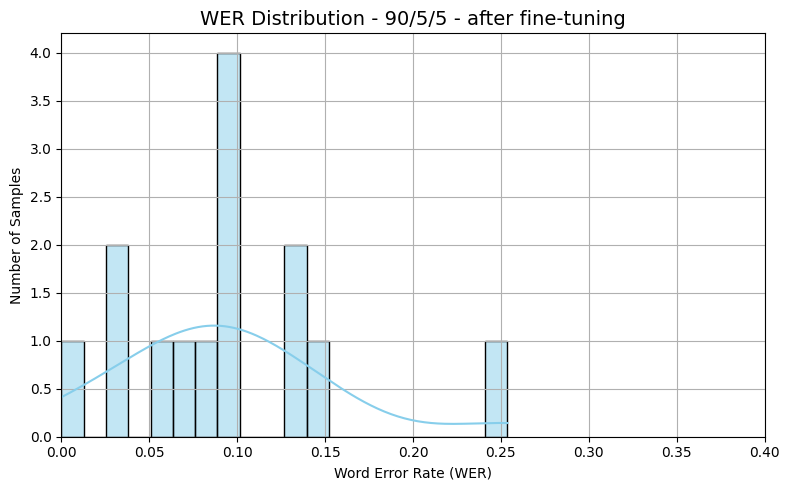

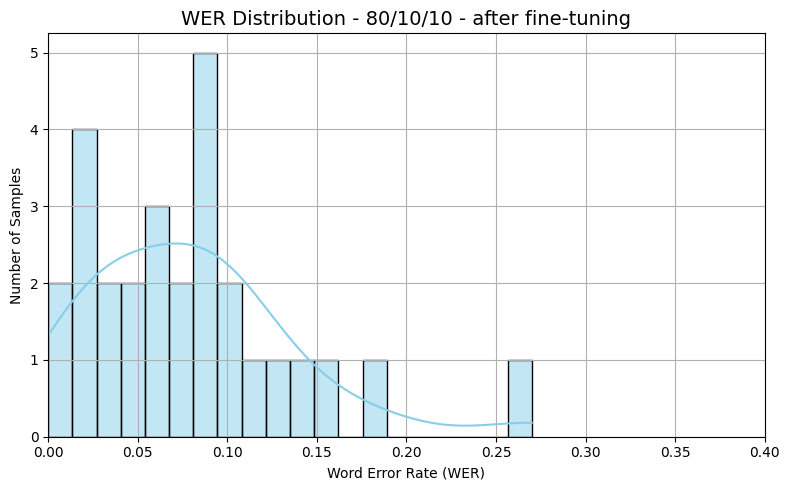

In [ ]:


from jiwer import Compose, ToLowerCase, RemovePunctuation, RemoveMultipleSpaces, wer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing chain
transformation = Compose([
    ToLowerCase(),
    RemovePunctuation(),
    RemoveMultipleSpaces()
])
df_store = dict()
files = ['best_90_10', 'best_80_20']

graph_title = {
    'best_90_10': '90/5/5 - after fine-tuning',
    'best_80_20': '80/10/10 - after fine-tuning'
}
wers = {}

for file in files:
    df = pd.read_csv(f"{file}.csv")
    # Extract hypothesis from dict
    # df['hypothesis'] = df['reference_text'].apply(lambda x: eval(x)['reference_text'] if isinstance(x, str) and x else x.get('reference_text'))
    # df['hypothesis'] = df['reference_text']
    # # Drop missing rows
    # df.dropna(subset=['prediction_text', 'hypothesis'], inplace=True)

    # Apply transformations to preview filtered version
    df['ref_clean'] = df['prediction_text'].apply(transformation)
    df['hyp_clean'] = df['reference_text'].apply(transformation)

    # Compute WER
    df['wer'] = df.apply(
        lambda row: wer(row['ref_clean'], row['hyp_clean']),
        axis=1
    )

    # ⬇️ WER plot right here
    plt.figure(figsize=(8, 5))
    sns.histplot(df['wer'], bins=20, kde=True, color="skyblue")
    plt.title(f"WER Distribution - {graph_title[file]}", fontsize=14)
    plt.xlabel("Word Error Rate (WER)")
    plt.ylabel("Number of Samples")
    plt.xlim(0, 0.4)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{file}_wer.pdf")
    plt.show()

    # Save average WER
    wers[file] = df['wer'].mean()
    # print(list(df['wer']))
    df.drop(columns=['prediction_text','reference_text'], inplace=True, errors='ignore')

    df.to_csv(f"{file}_wer.csv", index=False)

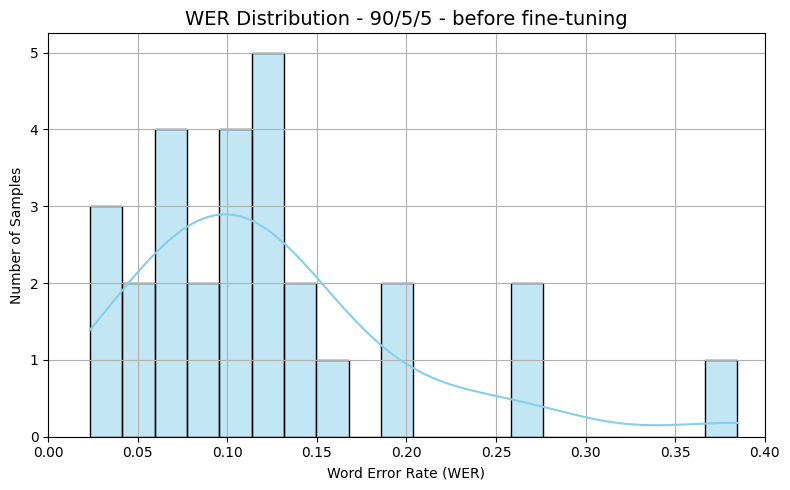

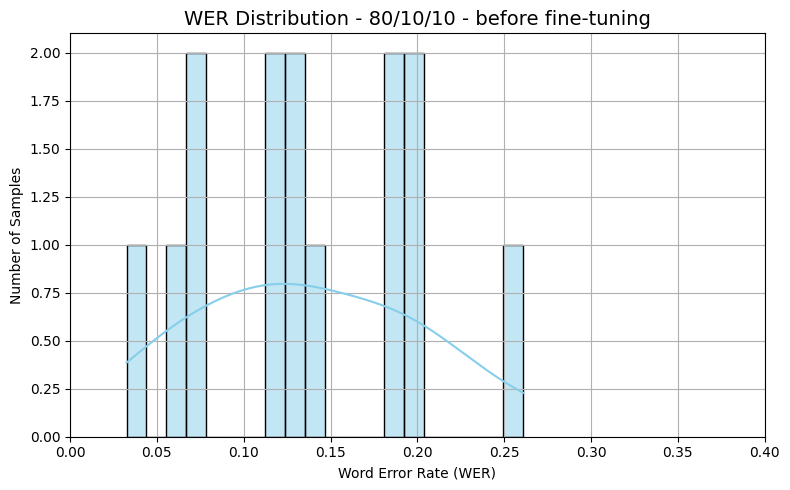

In [ ]:


from jiwer import Compose, ToLowerCase, RemovePunctuation, RemoveMultipleSpaces, wer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing chain
transformation = Compose([
    ToLowerCase(),
    RemovePunctuation(),
    RemoveMultipleSpaces()
])
df_store = dict()
files = ['pretrained_90_10', 'pretrained_80_20']
wers = {}
graph_title = {
    'pretrained_90_10': '90/5/5 - before fine-tuning',
    'pretrained_80_20': '80/10/10 - before fine-tuning'
}

for file in files:
    df = pd.read_csv(f"{file}.csv")
    # Extract hypothesis from dict
    # df['hypothesis'] = df['reference_text'].apply(lambda x: eval(x)['reference_text'] if isinstance(x, str) and x else x.get('reference_text'))
    # df['hypothesis'] = df['reference_text']
    # # Drop missing rows
    # df.dropna(subset=['prediction_text', 'hypothesis'], inplace=True)

    # Apply transformations to preview filtered version
    df['ref_clean'] = df['prediction_text'].apply(transformation)
    df['hyp_clean'] = df['reference_text'].apply(transformation)

    # # Compute WER
    # df['wer'] = df.apply(
    #     lambda row: wer(row['ref_clean'], row['hyp_clean']),
    #     axis=1
    # )

    # ⬇️ WER plot right here
    plt.figure(figsize=(8, 5))
    sns.histplot(df['wer'], bins=20, kde=True, color="skyblue")
    plt.title(f"WER Distribution - {graph_title[file]}", fontsize=14)
    plt.xlabel("Word Error Rate (WER)")
    plt.ylabel("Number of Samples")
    plt.xlim(0, 0.4)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{file}_wer.pdf")
    plt.show()

    # Save average WER
    wers[file] = df['wer'].mean()
    # print(list(df['wer']))
    df.drop(columns=['prediction_text','reference_text'], inplace=True, errors='ignore')

    df.to_csv(f"{file}_wer.csv", index=False)

In [ ]:
with open("whisper_output.txt", "r") as f:
	data = f.read()

text = data.split("\n")


In [ ]:
store = {}
n = len(text)
for i in range(n//2):
  store[int(text[2*i])] = text[2*i+1].strip()
# store

In [ ]:
df = pd.read_csv("nghe_an_wer.csv", index_col=0)
df.index.name = "index"
df.head()

,wer,ref_clean,hyp_clean
index,,,
0,0.058824,trẻ em thành phố hiện nay ngoài học thêm và ở ...,trẻ em thành phố hiện nay ngoài học thêm và ở ...
1,0.062500,dịp này cháu nghỉ hè phải cho cháu về quê còn ...,dịp này cháu nghỉ hè phải cho cháu về quê còn ...
2,0.184211,chơi dưới đường thì cũng không được an toàn bở...,chơi đường thì cũng không được an toàn bởi vì ...
3,0.083333,trên địa bàn thị xã cửa lò thiếu những cái điể...,trên địa bàn thị xã cờ lo thiếu những điểm sân...
4,0.095238,về cái quy hoạch tổng thể trước đây thì không ...,về kịch quy hoạch tổng thể trước đây thì không...


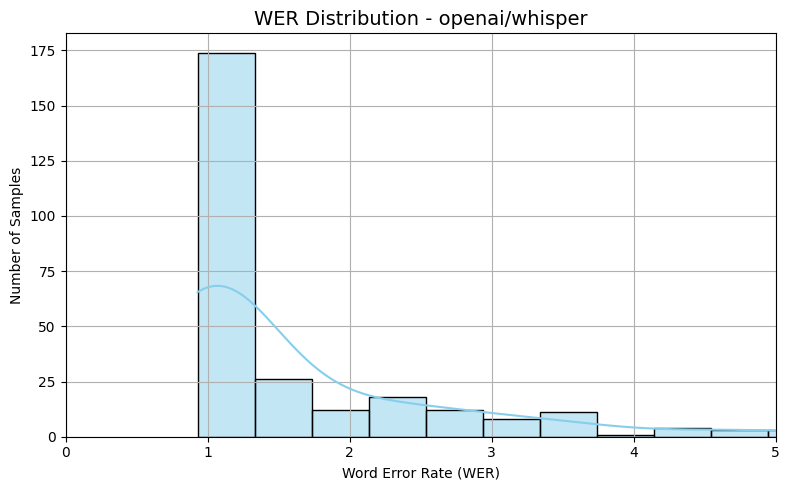

In [ ]:
df["pred_text"] = df.index.map(lambda x: store.get(x, ''))
df["pred_clean"] = df["pred_text"].apply(transformation)
# Compute WER
df['wer'] = df.apply(
    lambda row: wer(row['ref_clean'], row['pred_clean']),
    axis=1
)
df.drop(columns=['hyp_clean', 'pred_text'], inplace=True, errors='ignore')
df.head()

# ⬇️ WER plot right here
plt.figure(figsize=(8, 5))
sns.histplot(df['wer'], bins=20, kde=True, color="skyblue")
plt.title(f"WER Distribution - openai/whisper", fontsize=14)
plt.xlabel("Word Error Rate (WER)")
plt.ylabel("Number of Samples")
plt.xlim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"openai-whisper_wer.pdf")
plt.show()

# Save average WER
wers[file] = df['wer'].mean()
# print(list(df['wer']))
# df.drop(columns=['prediction_text','reference_text'], inplace=True, errors='ignore')

df.to_csv(f"openai-whisper_wer.csv", index=False)

In [ ]:
df['wer'].mean()

np.float64(1.7410808804386144)

In [ ]:
# !pip install bert_score
import os
os.chdir('/content/drive/MyDrive/CSCI_5541_project')
from bert_score import score
import ast

bertscore = dict()
files = ['nghe_an_transcription.csv', 'hue_transcription.csv', 'saigon_transcription.csv', 'hanoi_transcription.csv']
for file in files:
  df = pd.read_csv(file, index_col=0)
  df["temp"] = df["pho_transcription"].apply(ast.literal_eval)
  df["generated_text"] = df["temp"].apply(lambda x: x["text"])
  P, R, F1 = score(df["text"].tolist(), df["generated_text"].tolist(), lang="vi")
  df["bertscore_f1"] = F1
  bert = df['bertscore_f1'].mean()
  bertscore[file] = bert
  print(f"{file}: {bert}")

nghe_an_transcription.csv: 0.9124282002449036
hue_transcription.csv: 0.9057343602180481
saigon_transcription.csv: 0.9214816689491272
hanoi_transcription.csv: 0.9176069498062134


In [ ]:
df["bertscore_f1"] = F1
bert = df['bertscore_f1'].mean()
bert

np.float32(0.95267975)